# The Prediction of Titanic Passengers Survival

**Dataset and Problem Statement**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Titanic dataset contains information about the people involved in the Titanic shipwreck.

**Predict if a passenger survived the sinking of the Titanic or not.**



**Variables Description**

PassengerID : ID of the Passenger.

Survived: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name of the Passenger

Sex: Sex of the Passenger (Female / Male)

Age: Age of the Passenger.

Sibsp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket : Ticket number.

Fare: Passenger fare (British pound)

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# imputing age with median
missing_col = ['Age','Fare']
 
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
import matplotlib.pyplot as plt #(For Visualizations)
import seaborn as sns #(For Visualizations)
from sklearn.impute import SimpleImputer #(For imputation)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Survived', ylabel='count'>

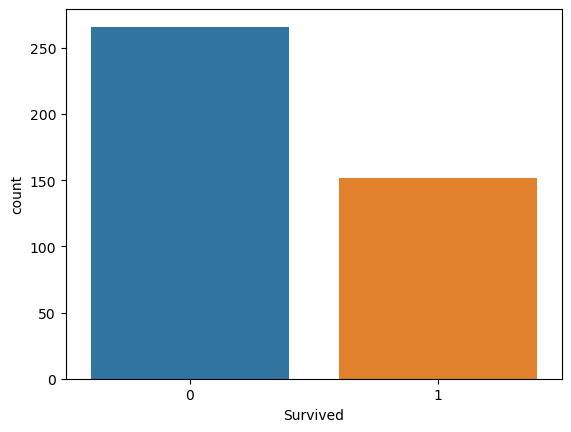

In [12]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

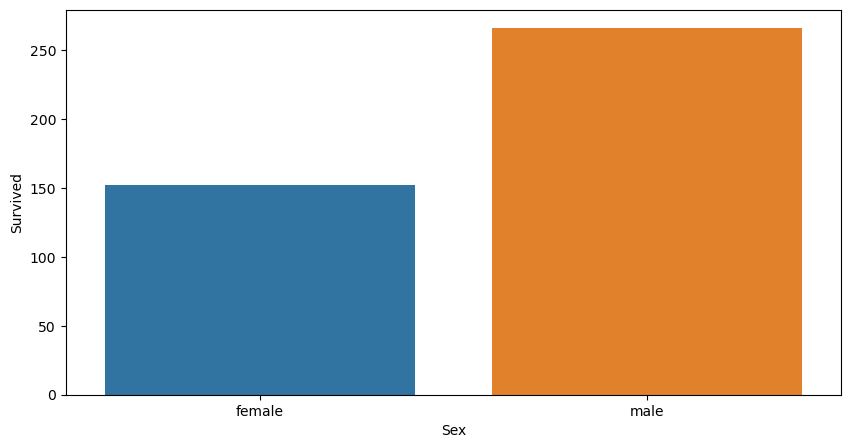

In [13]:
prdata=df.groupby('Sex').agg({'Survived':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data = prdata, ax=ax1)

<Axes: xlabel='Pclass', ylabel='Survived'>

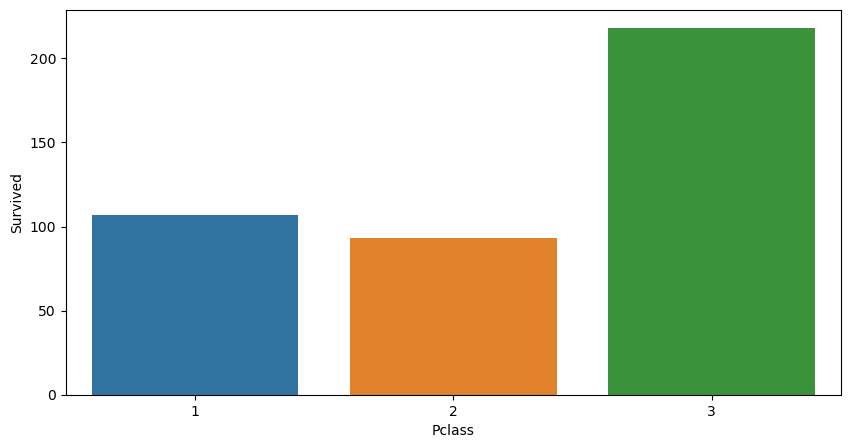

In [14]:
prdata=df.groupby('Pclass').agg({'Survived':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data = prdata, ax=ax1)

<Axes: xlabel='Embarked', ylabel='Survived'>

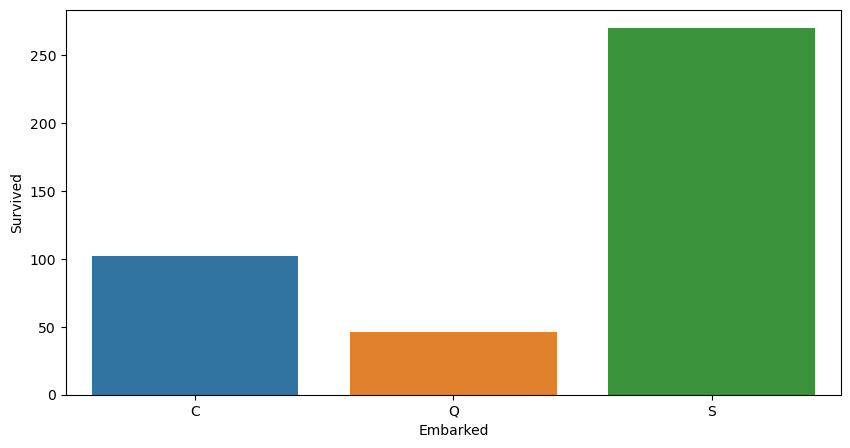

In [15]:
prdata=df.groupby('Embarked').agg({'Survived':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x='Embarked', y='Survived', data = prdata, ax=ax1)

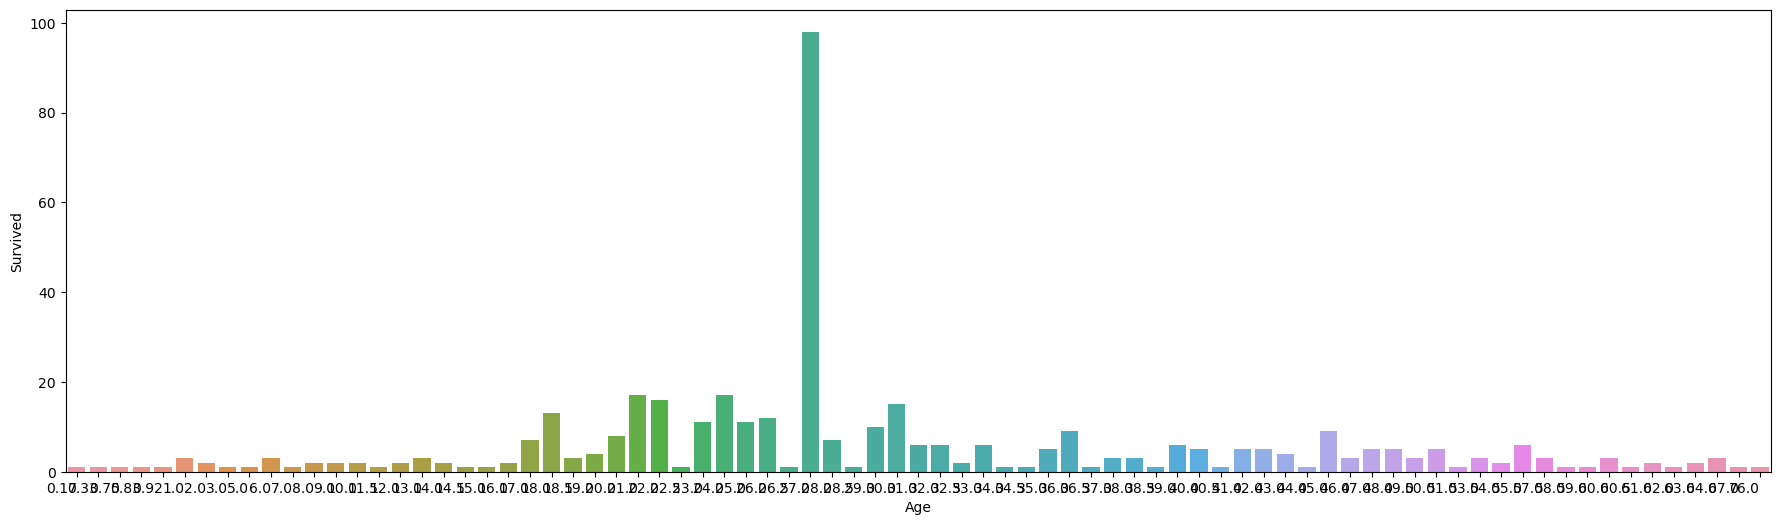

In [16]:
#checking the whitch age reported more fraud:
data=df.groupby('Age').agg({'Survived':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
graph =sns.barplot(x='Age', y='Survived', data = data, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

<Axes: ylabel='Survived'>

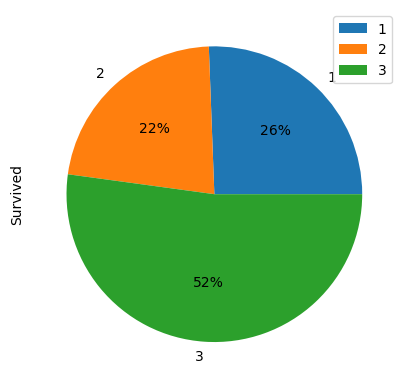

In [17]:
df.groupby(['Pclass']).count().plot(kind='pie', y='Survived', autopct='%1.0f%%')

In [18]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [19]:
# Importing the required libraries to perform pre-processing in train data and splitting into train-test split:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [21]:
df.drop(["PassengerId","Name","Cabin","Ticket"], axis = 1, inplace=True)

In [22]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S


In [23]:
# Dropping the target variable from train data and storing the rest of the attributes in "X" and target attribute in "y":
X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

In [24]:
# printing the shapes of X and y: 
print(X.shape, y.shape)

(418, 7) (418,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123,stratify=y)

In [26]:
#checking shape of train and test data:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 7)
(84, 7)
(334,)
(84,)


In [27]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        169
Embarked      3
dtype: int64

In [28]:
df["Pclass"] = df["Pclass"].astype('category')
df["Sex"] = df["Sex"].astype('category')
df["Embarked"] = df["Embarked"].astype('category')
df["Survived"] = df["Survived"].astype('category')
X_train["Pclass"] = X_train["Pclass"].astype('category')

In [29]:
X_train.dtypes

Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object

In [30]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
#defining numerical columns in data:
numeric_columns=df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [32]:
#defining categorical columns in data:
cat_columns=X_train.select_dtypes(['object','category']).columns
cat_columns

Index(['Pclass', 'Sex', 'Embarked'], dtype='object')

In [33]:
# Importing the required preprocessing libraries:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [34]:
#standardscaler for numerical columns
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), columns=numeric_columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns)

In [35]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [36]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

In [37]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [38]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)

In [41]:
Model=logistic_model.fit(X_train,y_train)

In [42]:
y_train_Pred = logistic_model.predict(X_train)
y_test_Pred = logistic_model.predict(X_test)

In [43]:
y_pred = logistic_model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred)
print(cmr)

[[53  0]
 [ 0 31]]


In [45]:
logistic_m=accuracy_score(y_test,y_pred)
logistic_m

1.0

In [46]:
print('Training score: ', round(logistic_model.score(X_train, y_train),3))
print('Testing score: ', round(logistic_model.score(X_test, y_test),3))

Training score:  1.0
Testing score:  1.0


In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [49]:
y_train_predt = dt.predict(X_train)
y_test_predt = dt.predict(X_test)

In [50]:
print('Training score: ', round(dt.score(X_train, y_train),3))
print('Testing score: ', round(dt.score(X_test, y_test),3))

Training score:  1.0
Testing score:  1.0


In [51]:
accuracy_score(y_test, y_test_predt)

1.0

In [52]:
final_pred = dt.predict(X_test)

In [53]:
final_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [54]:
final_pred=pd.DataFrame(final_pred)

In [55]:
final_pred.head(3)

,0
0,0
1,0
2,1
